In [1]:
from tqdm import tqdm
import random

In [2]:
with open('./data/5_letters_words.txt', 'rb') as file:
    words = file.readlines()

cleaned_words = []
for word in tqdm(words):
    cleaned_words.append(word.decode().replace('\n', ''))

100%|██████████| 12927/12927 [00:00<00:00, 1136182.56it/s]


In [3]:
letters = 'abcdefghijklmnopqrstuvwxyz'
vowels = 'aeiouy'
consonant = ''.join([letter for letter in letters if letter not in vowels])

In [4]:
def count_non_duplicate_letters(c, v):
    return sum(1 for char in set(c) if char in v)

In [5]:
def find_best_starting_word():
    best_count = 0
    best_word = ''
    for word in tqdm(cleaned_words):
        n_unique_vowels = count_non_duplicate_letters(word, vowels)
        if n_unique_vowels > best_count:
            best_count = n_unique_vowels
            best_word = word
    return best_count, best_word

In [6]:
_, best_word = find_best_starting_word()
best_word

100%|██████████| 12927/12927 [00:00<00:00, 399411.91it/s]


'adieu'

In [20]:
from typing import List

def remove_last_occurrence(word, letter):
    index = word.rfind(letter)
    if index != -1:
        word = word[:index] + word[index+1:]
    return word

def find_correctly_placed_letters(word_to_find:str, guess:str):
    well_placed_letters = ['']*5
    for i in range(len(word_to_find)):
        well_placed_letters[i] = word_to_find[i] if word_to_find[i] == guess[i] else ''
    return well_placed_letters

def find_incorrectly_placed_letters(word_to_find:str, guess:str, correctly_placed:List[str]):
    # word_to_find_copy = word_to_find[:]
    # correctly_placed_copy = correctly_placed[:]

    incorrectly_placed_letters = []
    # for i, letter in enumerate(guess):
    #     if letter in word_to_find_copy:
    #         if letter in correctly_placed_copy:
    #             correctly_placed_copy.remove(letter)
    #         else:
    #             incorrectly_placed_letters.append(letter)


    for i, letter in enumerate(guess):
        if guess[i] != word_to_find[i] and guess[i] in word_to_find:
            incorrectly_placed_letters.append(letter)
        else:
            incorrectly_placed_letters.append('')
    return incorrectly_placed_letters


In [21]:
word_to_find, guess = 'amens', 'ammee'

In [22]:
correctly_placed_letters = find_correctly_placed_letters(word_to_find, guess)
correctly_placed_letters

['a', 'm', '', '', '']

In [23]:
find_incorrectly_placed_letters(word_to_find, guess, correctly_placed_letters), correctly_placed_letters

(['', '', 'm', 'e', 'e'], ['a', 'm', '', '', ''])

In [24]:
import pandas as pd
from collections import Counter

def calc_distrib(words__):
    positions = {i: [] for i in range(5)}
    for word in words__:
        for i, letter in enumerate(word):
            positions[i].append(letter)

    # Calculate frequency for each position
    frequency = {i: Counter(positions[i]) for i in range(5)}

    # Create a DataFrame for easier plotting
    return pd.DataFrame(frequency).fillna(0).astype(int) / len(words__)

def find_best_word_from_distrib(df, words):
    best_ = words[0]
    best__ = 0
    for word in words:
        ss= 1
        for i, l in enumerate(word):
            ss *= df[i][l]
        if len(set(word)) != 5:
            ss *= 0.5
        if ss >= best__:
            best_ = word
            best__ = ss
    return best_

In [25]:
from termcolor import colored

In [26]:
list_well_placed_letters = []
list_incorrectly_placed_letters = []
list_non_present_letters = set()

def wordle(word_to_find:str, guess:str, verbose:bool):
    

    correctly_placed_letters = find_correctly_placed_letters(word_to_find, guess)
    list_well_placed_letters.append(correctly_placed_letters)

    incorrectly_placed_letters = find_incorrectly_placed_letters(word_to_find, guess, correctly_placed_letters)
    list_incorrectly_placed_letters.append(incorrectly_placed_letters)

    if verbose:
        print('testing : ', end='')

        for i, letter in enumerate(guess):
            if word_to_find[i] == guess[i]:
                print(colored(letter, 'green'), end='')
            elif guess[i] in word_to_find:
                print(colored(letter, 'yellow'), end='')
            else:
                print(letter, end='')
        print('\n', end='')



    for letter in guess:
        if not (letter in word_to_find):
            list_non_present_letters.add(letter)
    
    return word_to_find == guess

In [42]:
def filter_words(words_list:List[str], list_well_placed_letters_, list_incorrectly_placed_letters_, list_non_present_letters_):
    # non present letters
    words_left = [word for word in words_list if all(char not in list_non_present_letters_ for char in word)]

    # incorrectly placed letter
    for guess in list_incorrectly_placed_letters_:
        for i, letter in enumerate(guess):
            for word in reversed(words_left):
                if letter and ((not (letter in word)) or (letter == word[i])):
                    words_left.remove(word)
                    continue

    
    # well placed letters
    for guess in list_well_placed_letters_:
        for i in range(len(guess)):
            if not guess[i]:
                continue
            for word in reversed(words_left):
                if guess[i] != word[i]:
                    words_left.remove(word)
                    continue
    return words_left


def wordle_solver(verbose=True):
    i=0
    win = False
    words_left = cleaned_words[:]
    word_to_find = random.choice(cleaned_words)
    # win = wordle(word_to_find=word_to_find, guess='cares')

    if verbose:
        print('Finding : ' + word_to_find)
    # print(list_well_placed_letters, list_incorrectly_placed_letters, list_non_present_letters)
    # words_left = filter_words(cleaned_words, list_well_placed_letters, list_incorrectly_placed_letters, list_non_present_letters)
    c = True
    while c and not win and i < 6:
        i+=1
        try:
            w = find_best_word_from_distrib(calc_distrib(words_left), words_left)
            win = wordle(word_to_find=word_to_find, guess=w, verbose=verbose)
            words_left.remove(w)
            # print(list_well_placed_letters, list_incorrectly_placed_letters, list_non_present_letters)
            words_left = filter_words(words_left, list_well_placed_letters, list_incorrectly_placed_letters, list_non_present_letters)
            # print( list_incorrectly_placed_letters)
        except KeyboardInterrupt as e:
            c = False
    return i


In [69]:
list_well_placed_letters = []
list_incorrectly_placed_letters = []
list_non_present_letters = set()
wordle_solver()

Finding : named
testing : cares
testing : paled
testing : fazed
testing : waned
testing : named


5

In [61]:
rates = []
n_tests = 1000
for i in tqdm(range(n_tests)):
    list_well_placed_letters = []
    list_incorrectly_placed_letters = []
    list_non_present_letters = set()
    rates.append(wordle_solver(verbose=False))
print(sum(rates)/n_tests)

100%|██████████| 1000/1000 [10:48<00:00,  1.54it/s]

4.521


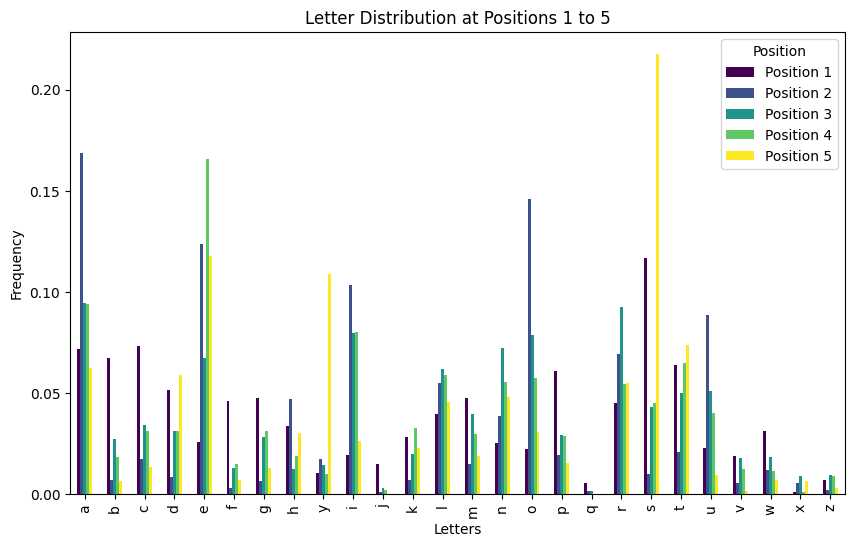

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

words__ = cleaned_words

# Count the letters at each position
positions = {i: [] for i in range(5)}
for word in words__:
    for i, letter in enumerate(word):
        positions[i].append(letter)

# Calculate frequency for each position
frequency = {i: Counter(positions[i]) for i in range(5)}

# Create a DataFrame for easier plotting
df = pd.DataFrame(frequency).fillna(0).astype(int) / len(words__)

# Plot the data
df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Letter Distribution at Positions 1 to 5")
plt.xlabel("Letters")
plt.ylabel("Frequency")
plt.legend([f"Position {i+1}" for i in range(5)], title="Position")
plt.show()